In [215]:
import numpy as np
import pandas as pd
import dataload
import datetime as dt
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

## 0. 데이터로드

In [4]:
weather = pd.read_csv('../data/weather_final.csv', encoding='cp949')
buy_full = dataload.load_buy()

In [31]:
food_cluster = pd.read_csv('../data/food_tsclustering.csv', encoding='cp949')
food_cluster = food_cluster[['sm_cat', 'cluster']]

app_cluster = pd.read_csv('../data/app_tsclustering2.csv', encoding='cp949')
app_cluster = app_cluster[['sm_cat', 'cluster']]

beauty_cluster = pd.read_csv('../data/beauty_tsclustering2.csv', encoding='cp949')
beauty_cluster = beauty_cluster[['sm_cat', 'cluster']]

In [8]:
buy_full['date'] = buy_full['date'].apply(lambda x : pd.to_datetime(x, format='%Y%m%d'))
buy_full['year'] = buy_full['date'].apply(lambda x : x.year)
buy_full['month'] = buy_full['date'].apply(lambda x : x.month)
buy_full['day'] = buy_full['date'].apply(lambda x : x.day)

### 0-1. 대분류별 / 클러스터별 분리

In [14]:
buy1819 = buy_full[(buy_full.year == 2018)|(buy_full.year == 2019)]

#### 식품

In [15]:
food1819 = buy1819[buy1819.big_cat=='식품']
food = food1819.merge(food_cluster, on='sm_cat')
food.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,식품,가공란,37,2018,1,1,2
1,2018-01-01,F,30,식품,가공란,16,2018,1,1,2
2,2018-01-01,F,40,식품,가공란,9,2018,1,1,2
3,2018-01-01,F,50,식품,가공란,3,2018,1,1,2
4,2018-01-01,M,20,식품,가공란,13,2018,1,1,2


In [23]:
for cluster in food.cluster.unique():
    globals()['food{}'.format(cluster)] = food[food['cluster'] == cluster].reset_index(drop=True)

In [24]:
food0.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,식품,감/홍시,6,2018,1,1,0
1,2018-01-01,F,30,식품,감/홍시,9,2018,1,1,0
2,2018-01-01,F,40,식품,감/홍시,10,2018,1,1,0
3,2018-01-01,F,50,식품,감/홍시,5,2018,1,1,0
4,2018-01-01,F,60,식품,감/홍시,3,2018,1,1,0


#### 냉난방가전

In [33]:
app1819 = buy1819[buy1819.big_cat=='냉난방가전']
app = app1819.merge(app_cluster, on='sm_cat')
app.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,냉난방가전,가열식 가습기,1,2018,1,1,0
1,2018-01-01,F,40,냉난방가전,가열식 가습기,3,2018,1,1,0
2,2018-01-01,M,20,냉난방가전,가열식 가습기,1,2018,1,1,0
3,2018-01-01,M,40,냉난방가전,가열식 가습기,2,2018,1,1,0
4,2018-01-02,F,30,냉난방가전,가열식 가습기,11,2018,1,2,0


In [35]:
for cluster in app.cluster.unique():
    globals()['app{}'.format(cluster)] = app[app['cluster'] == cluster].reset_index(drop=True)

In [36]:
app0.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,냉난방가전,가열식 가습기,1,2018,1,1,0
1,2018-01-01,F,40,냉난방가전,가열식 가습기,3,2018,1,1,0
2,2018-01-01,M,20,냉난방가전,가열식 가습기,1,2018,1,1,0
3,2018-01-01,M,40,냉난방가전,가열식 가습기,2,2018,1,1,0
4,2018-01-02,F,30,냉난방가전,가열식 가습기,11,2018,1,2,0


#### 뷰티

In [37]:
beauty1819 = buy1819[buy1819.big_cat=='뷰티']
beauty = beauty1819.merge(beauty_cluster, on='sm_cat')
beauty.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,뷰티,기능성 링클케어 화장품,2,2018,1,1,3
1,2018-01-01,F,40,뷰티,기능성 링클케어 화장품,1,2018,1,1,3
2,2018-01-02,F,20,뷰티,기능성 링클케어 화장품,2,2018,1,2,3
3,2018-01-02,F,30,뷰티,기능성 링클케어 화장품,18,2018,1,2,3
4,2018-01-02,F,40,뷰티,기능성 링클케어 화장품,4,2018,1,2,3


In [38]:
for cluster in beauty.cluster.unique():
    globals()['beauty{}'.format(cluster)] = beauty[beauty['cluster'] == cluster].reset_index(drop=True)

In [39]:
beauty0.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,cluster
0,2018-01-01,F,20,뷰티,기능성 아이케어 화장품,57,2018,1,1,0
1,2018-01-01,F,30,뷰티,기능성 아이케어 화장품,83,2018,1,1,0
2,2018-01-01,F,40,뷰티,기능성 아이케어 화장품,81,2018,1,1,0
3,2018-01-01,F,50,뷰티,기능성 아이케어 화장품,33,2018,1,1,0
4,2018-01-01,F,60,뷰티,기능성 아이케어 화장품,2,2018,1,1,0


## 1. EDA

### 1-1. 식품

In [274]:
def plot_sm_cat_bar(data, var): # var = 'age' or 'sex'
    if var == None:
        sample = data.groupby(['sm_cat']).sum().reset_index()[['sm_cat', 'qty']].sort_values(by='qty', ascending=False)
        plt.figure(figsize=(20,6))
        sns.barplot(data=sample.iloc[:100,:], x='sm_cat', y='qty')
        plt.title('식품 판매량 TOP100')
        plt.xticks(rotation=90)
    else:
        items = data.groupby(['sm_cat']).sum().reset_index()[['sm_cat', 'qty']].sort_values(by='qty', ascending=False).sm_cat.values
        sample = data.groupby(['sm_cat', var]).sum().reset_index()[['sm_cat', var, 'qty']].sort_values(by=['sm_cat', 'qty'], ascending=False)
        plt.figure(figsize=(20,6))
        items_list = items[:20]
        sns.barplot(data=sample[sample.sm_cat.isin(items_list)], x='sm_cat', y='qty', hue=var, order=items_list)
        plt.title('{}별 식품 판매량 TOP20'.format(var))
        plt.xticks(rotation=90)

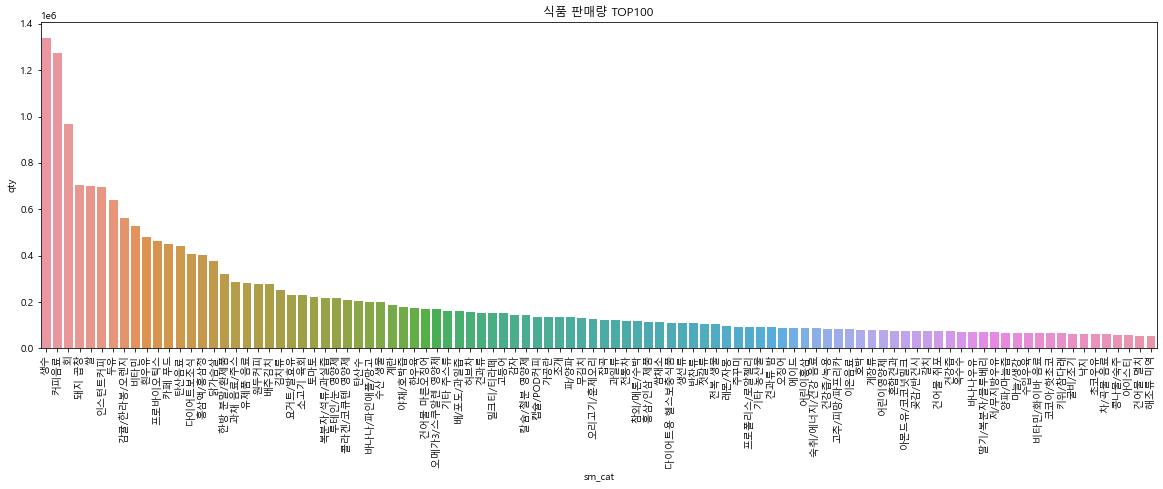

In [246]:
plot_sm_cat_bar(food, None)

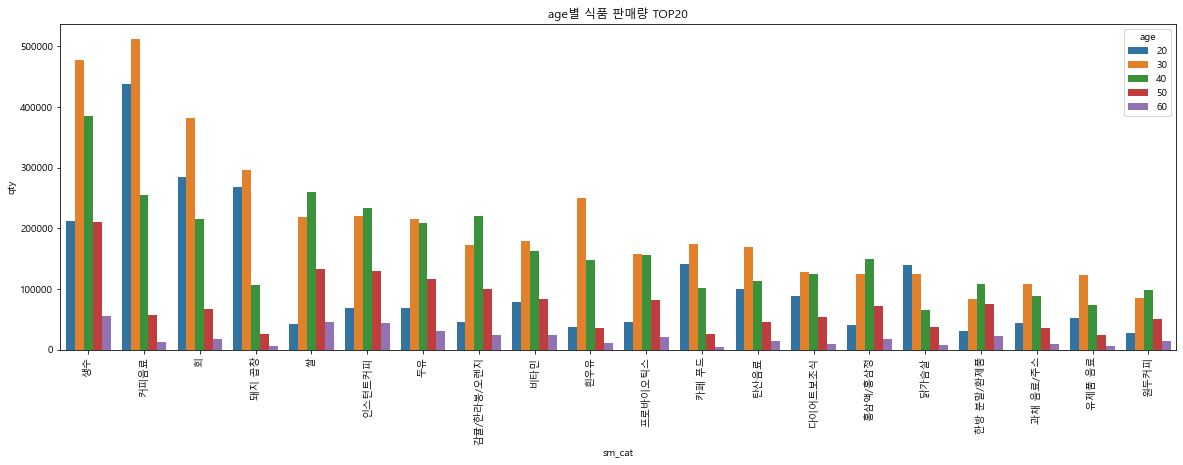

In [275]:
plot_sm_cat_bar(food, 'age')

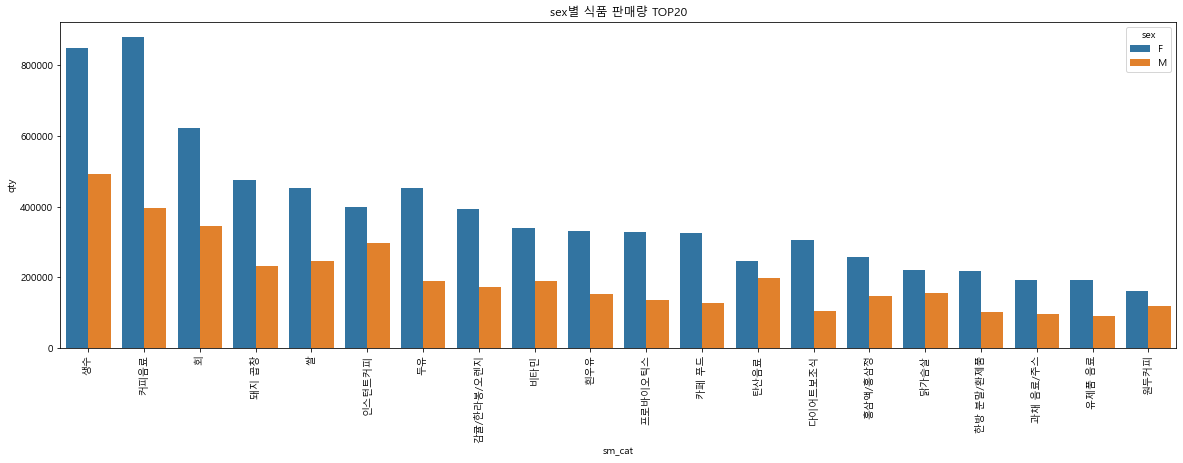

In [276]:
plot_sm_cat_bar(food, 'sex')

In [296]:
def plot_sm_cat_line(data, item, var, r, c): # var = 'age' or 'sex'
    sample = data[data.sm_cat==item].groupby(['year', 'month', 'age', 'sex']).sum().reset_index()
    sample['nqty'] = (sample.qty-min(sample.qty))/(max(sample.qty)-min(sample.qty))
    if var == None:
        sample = sample.groupby(['year', 'month']).sum().reset_index()
        sample['date'] = sample.apply(lambda x : str(int(x.year))[2:] + '-' + str(int(x.month)).zfill(2), axis=1)
        sns.lineplot(x='date', y='nqty', data=sample, palette="Set2", ax=axes[r,c])
        axes[r,c].set_title(item)
        axes[r,c].set_xticklabels(labels=sample['date'], rotation=60)
    else:
        sample['date'] = sample.apply(lambda x : str(x.year)[2:] + '-' + str(x.month).zfill(2), axis=1)
        sns.lineplot(x='date', y='nqty', data=sample, hue=var, palette="Set2", ax=axes[r,c])
        axes[r,c].set_title(item)
        axes[r,c].set_xticklabels(labels=sample['date'], rotation=60)

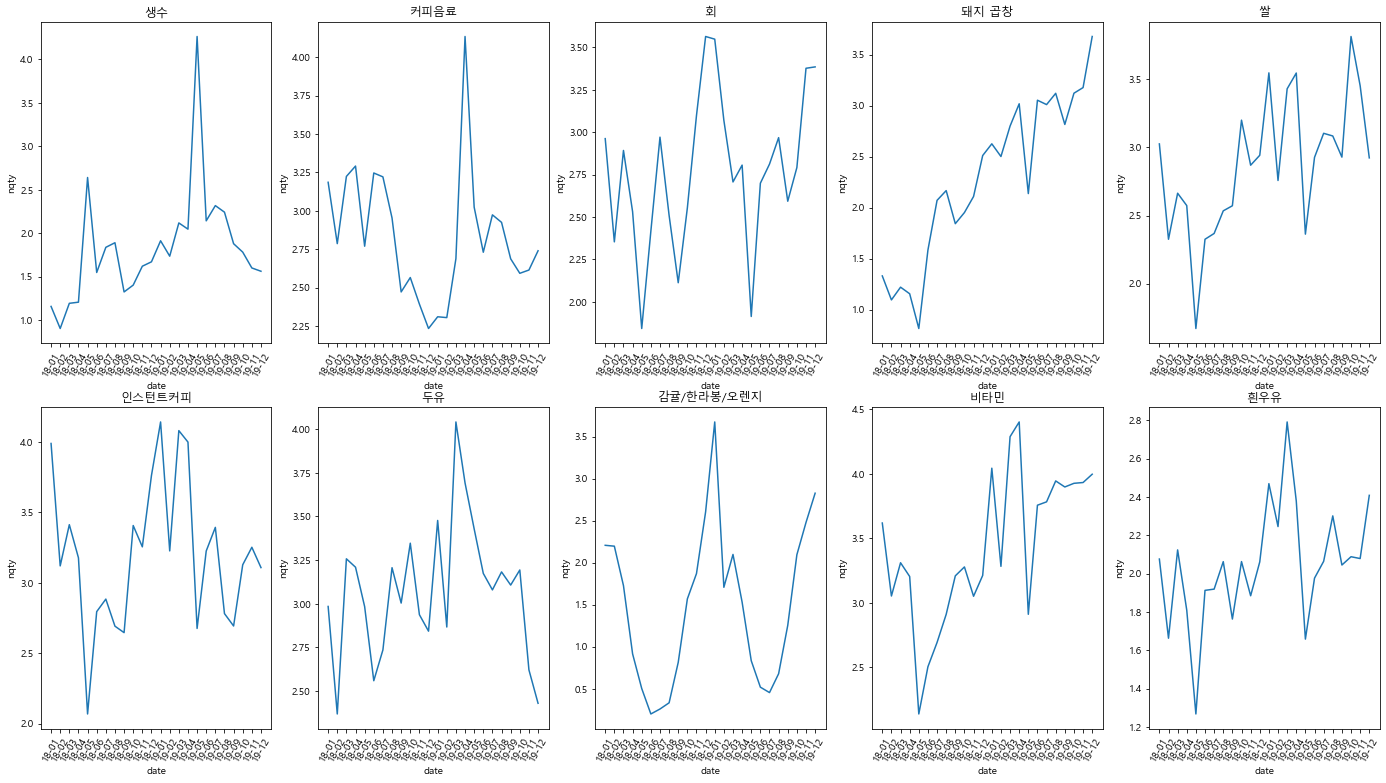

In [297]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
food_list = food_popular.sm_cat[:10].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(food, food_list[r,c], None, r, c)

`회`, `감귤/한라봉/오렌지`

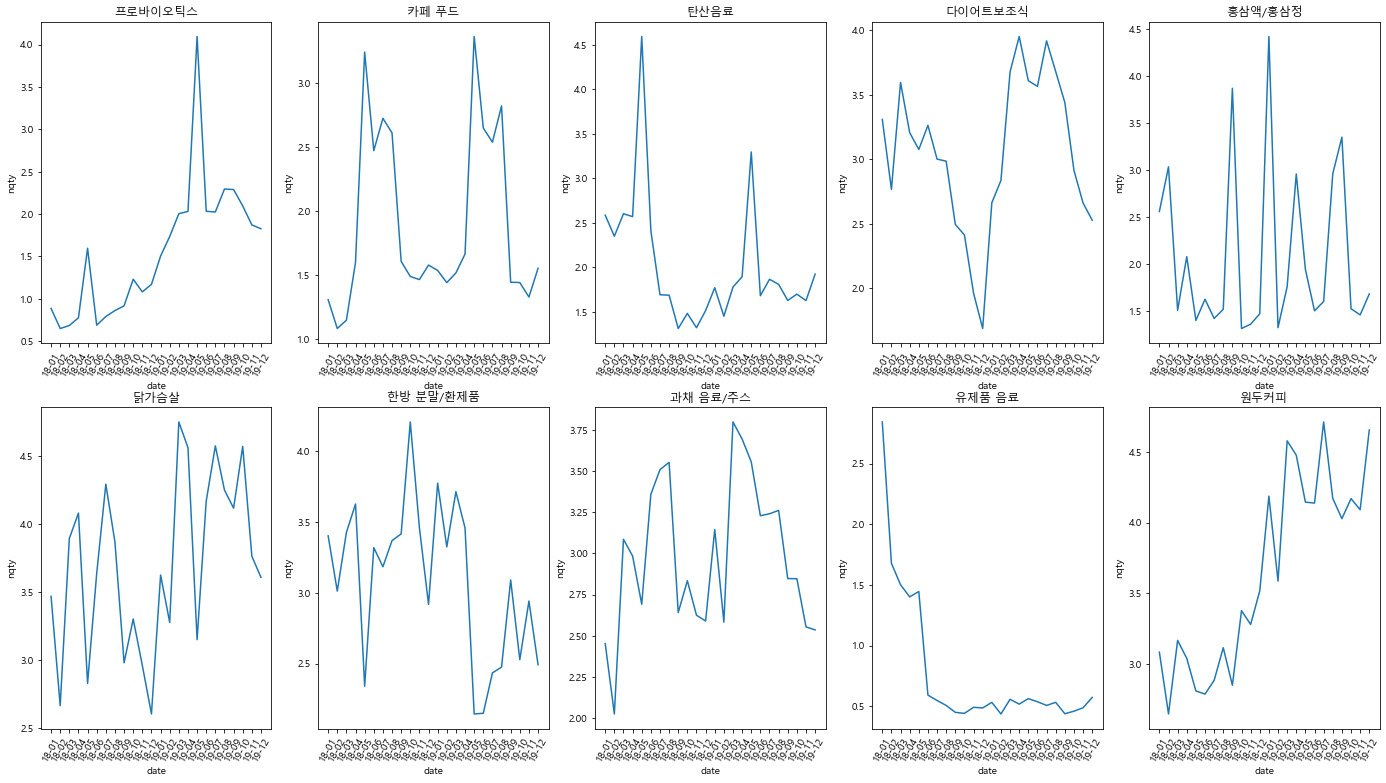

In [298]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
food_list = food_popular.sm_cat[10:20].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(food, food_list[r,c], None, r, c)

`카페푸드`

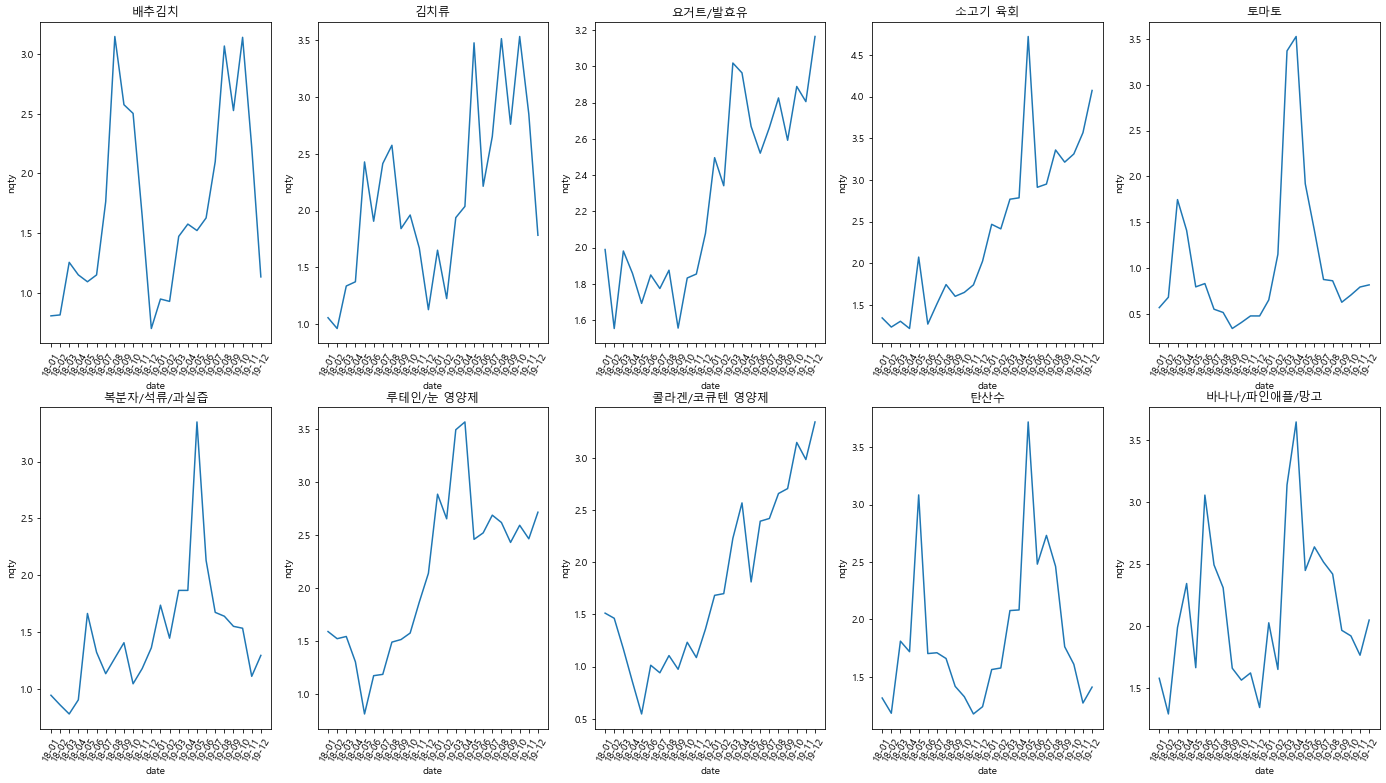

In [299]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
food_list = food_popular.sm_cat[20:30].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(food, food_list[r,c], None, r, c)

`배추김치`, `토마토`, `탄산수`, `바나나/파인애플/망고`

### 1-2. 냉난방가전

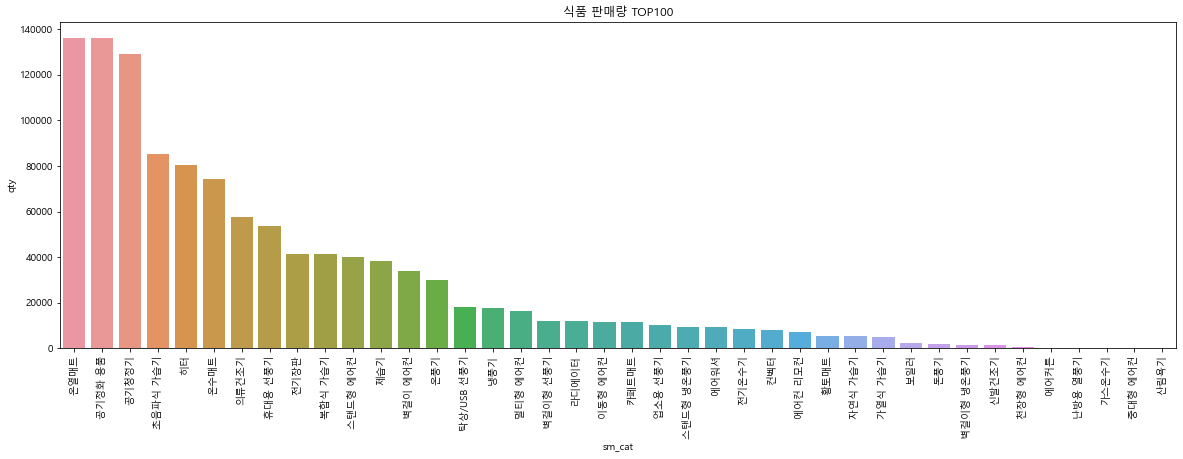

In [278]:
plot_sm_cat_bar(app, None)

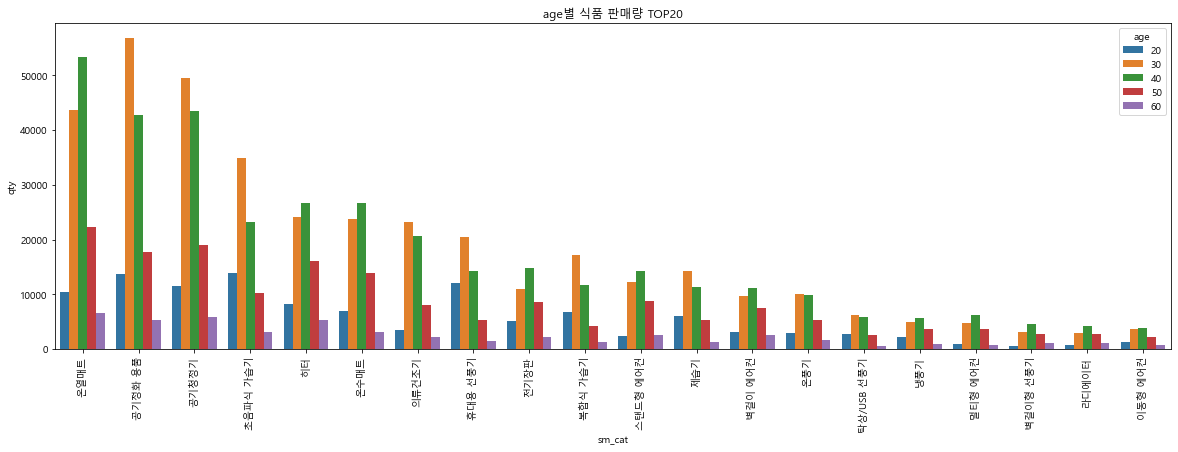

In [279]:
plot_sm_cat_bar(app, 'age')

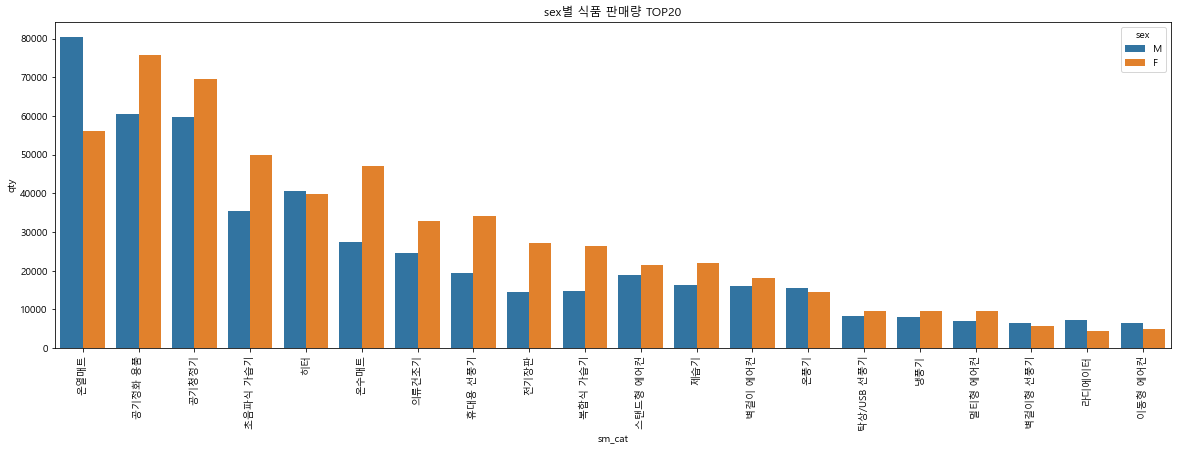

In [280]:
plot_sm_cat_bar(app, 'sex')

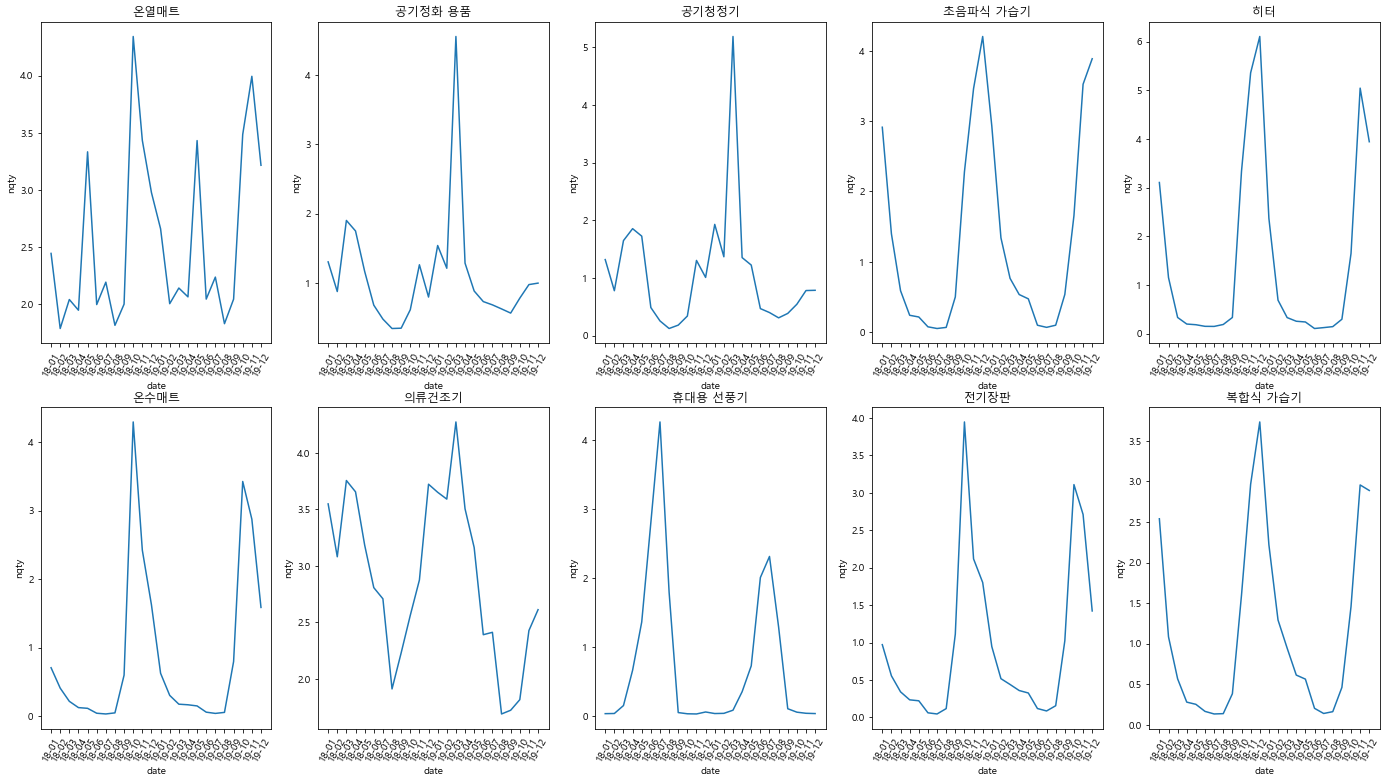

In [300]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
app_list = app_popular.sm_cat[0:10].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(app, app_list[r,c], None, r, c)

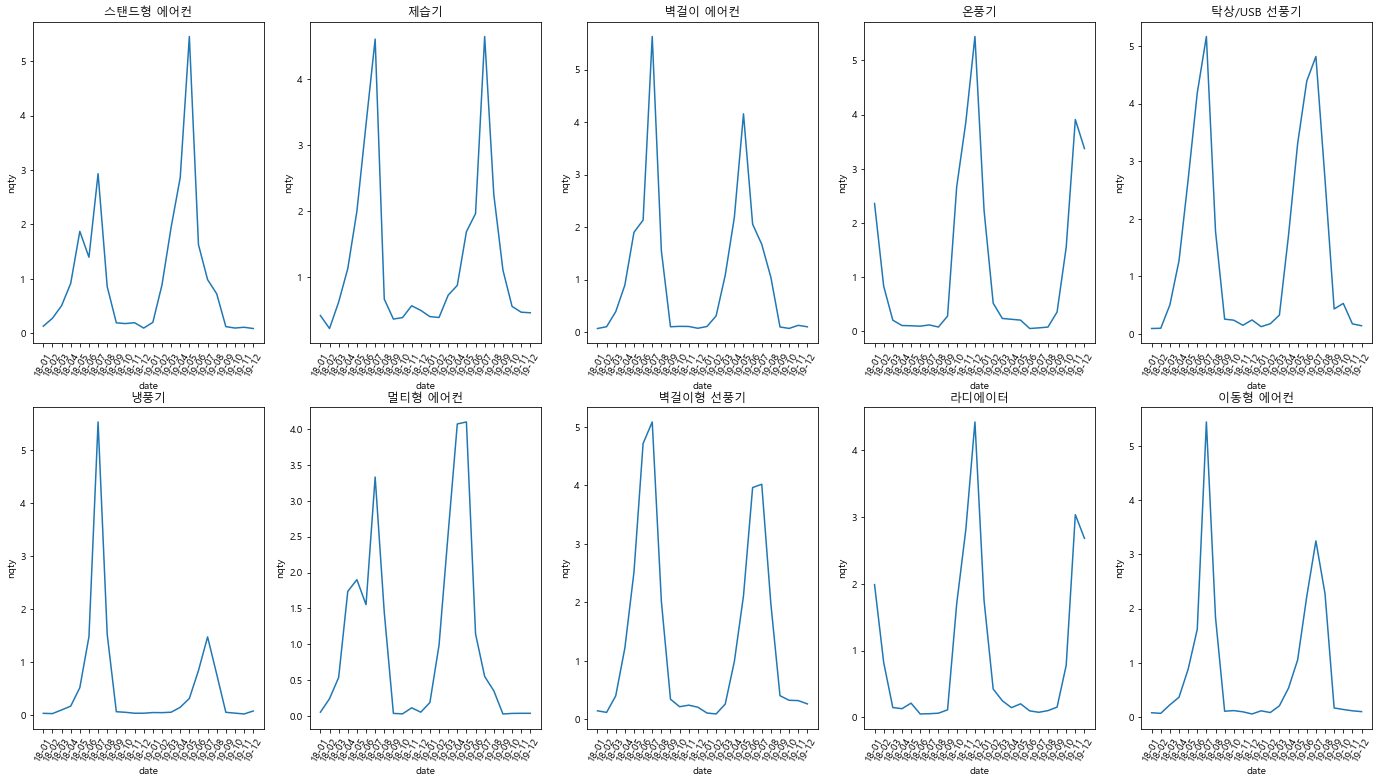

In [301]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
app_list = app_popular.sm_cat[10:20].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(app, app_list[r,c], None, r, c)

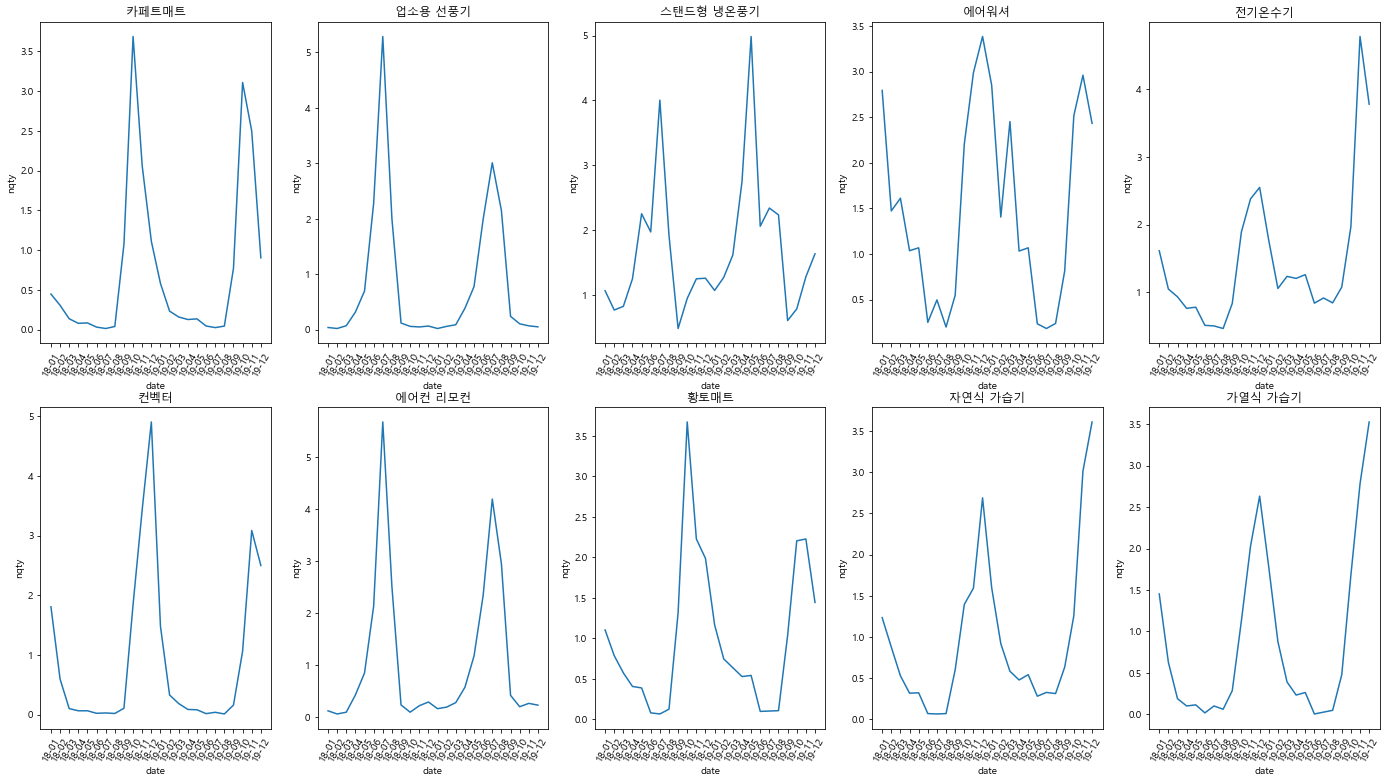

In [302]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
app_list = app_popular.sm_cat[20:30].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(app, app_list[r,c], None, r, c)

### 1-3. 뷰티

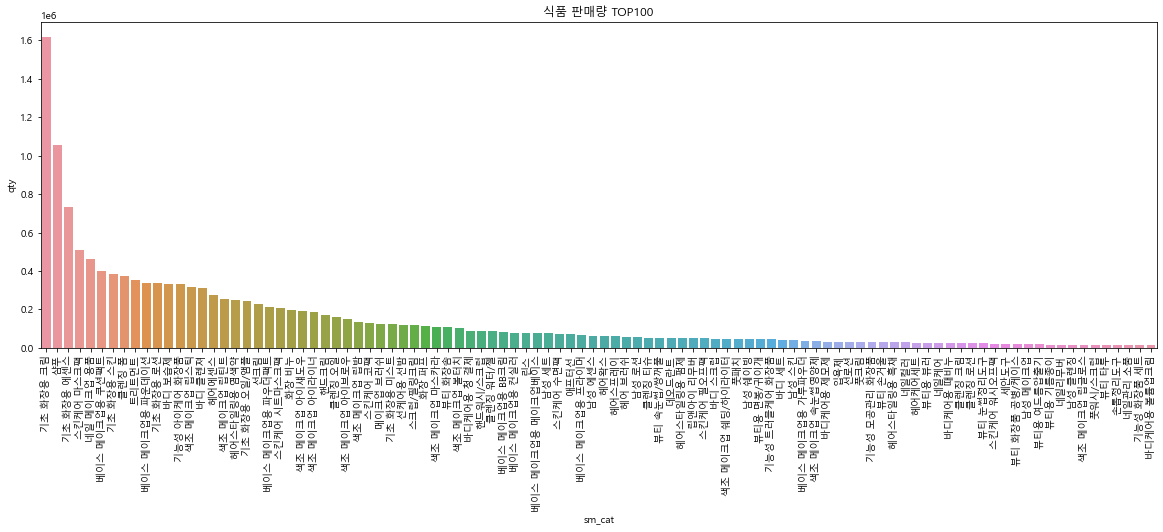

In [283]:
plot_sm_cat_bar(beauty, None)

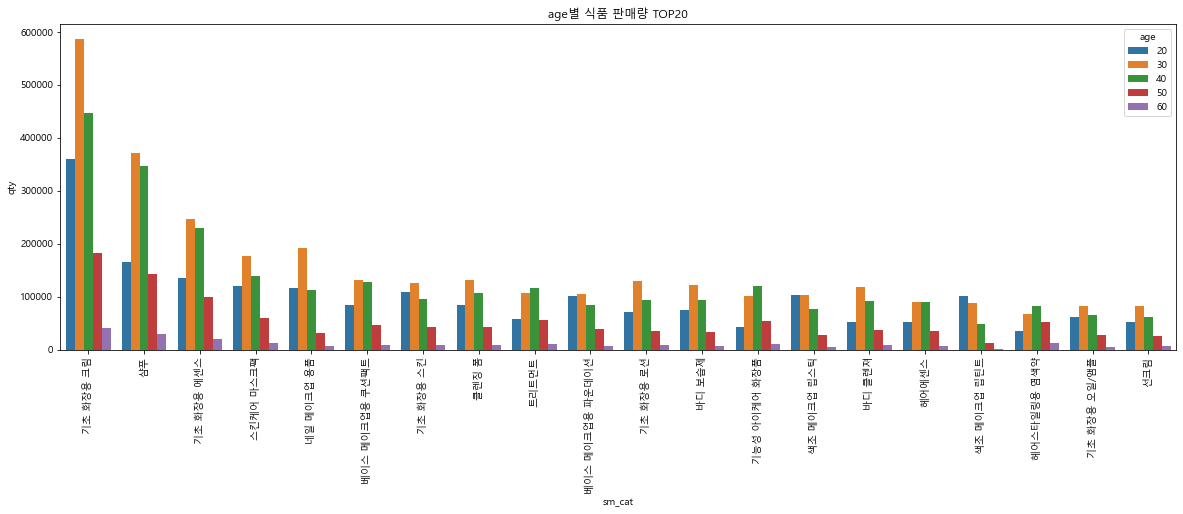

In [281]:
plot_sm_cat_bar(beauty, 'age')

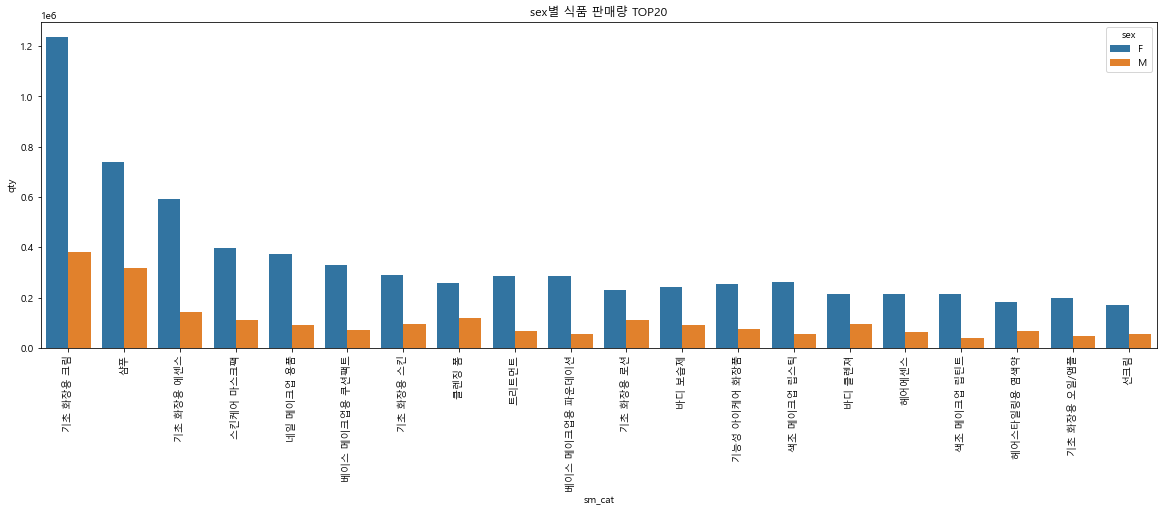

In [282]:
plot_sm_cat_bar(beauty, 'sex')

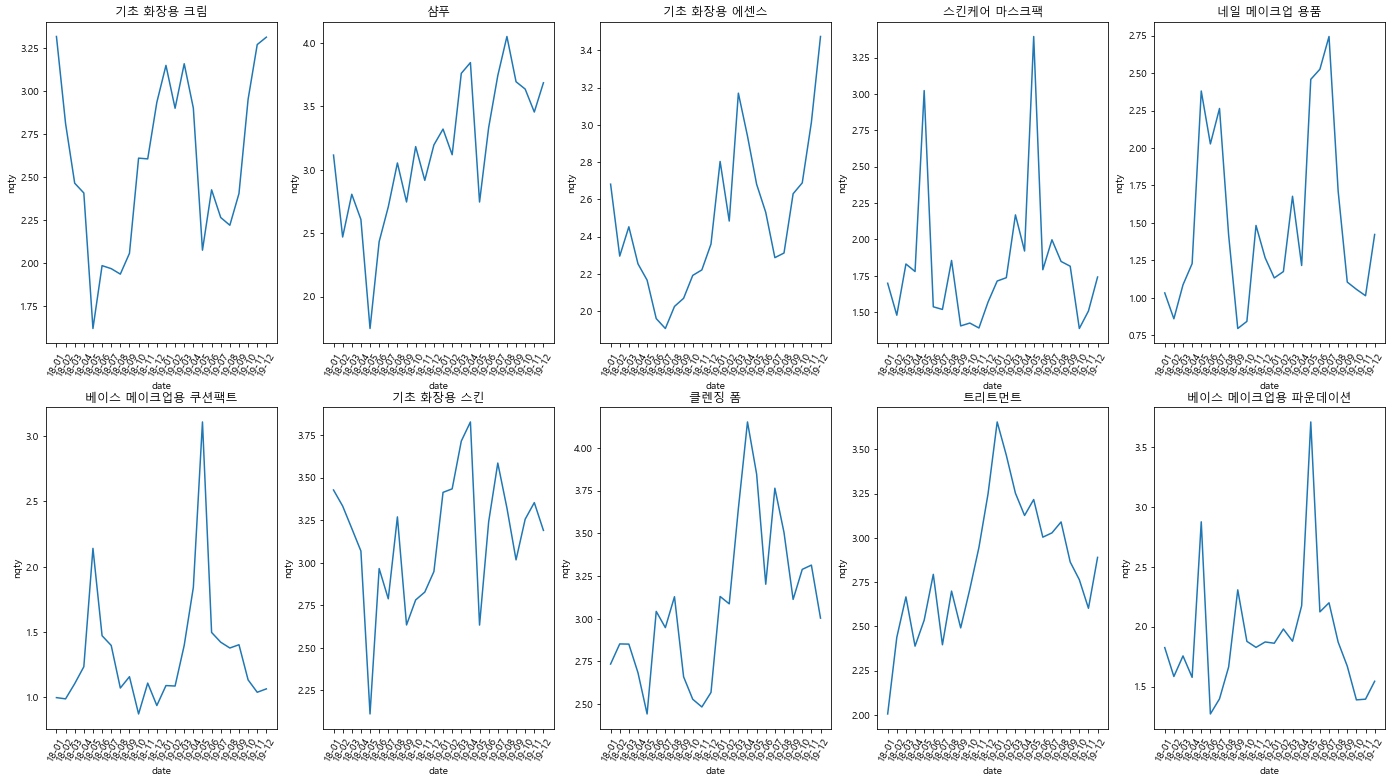

In [308]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
beauty_list = beauty_popular.sm_cat[:10].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(beauty, beauty_list[r,c], None, r, c)

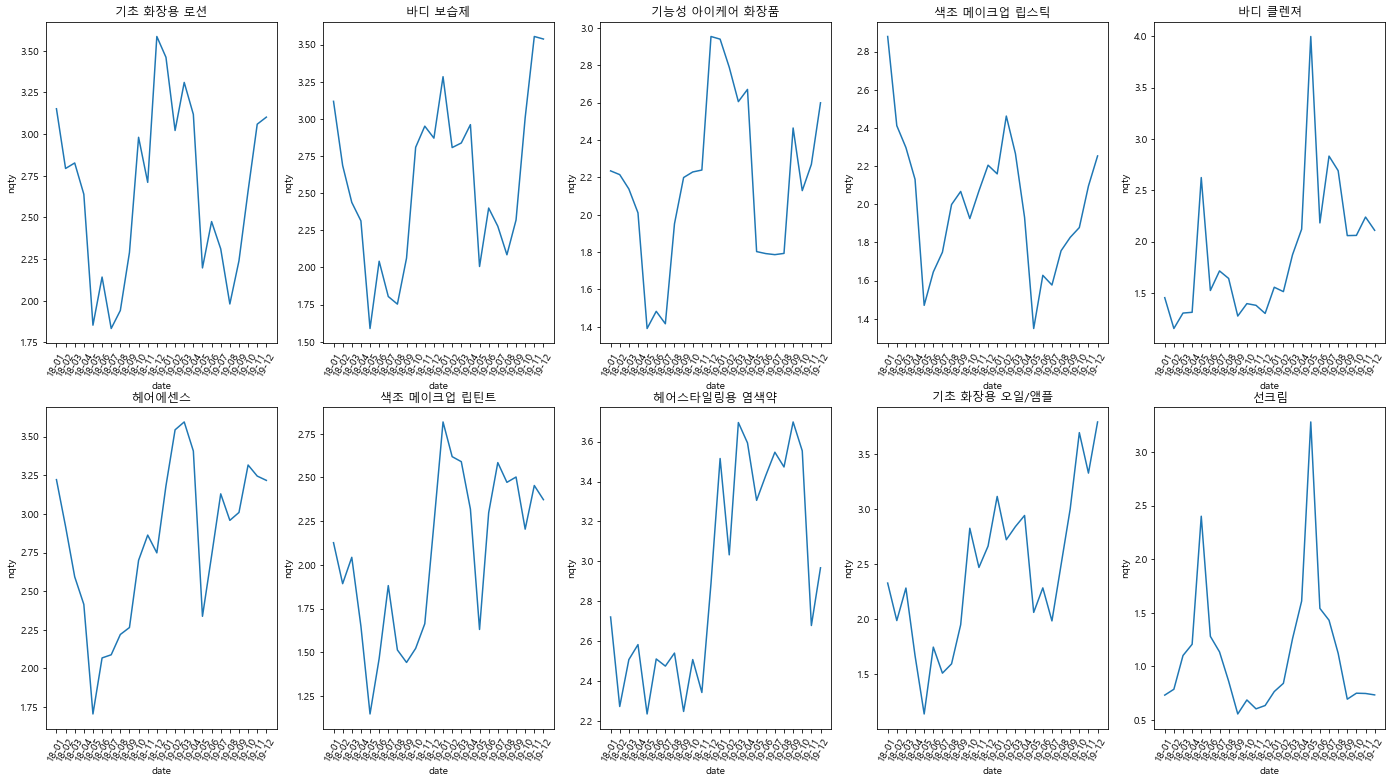

In [307]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
beauty_list = beauty_popular.sm_cat[10:20].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(beauty, beauty_list[r,c], None, r, c)

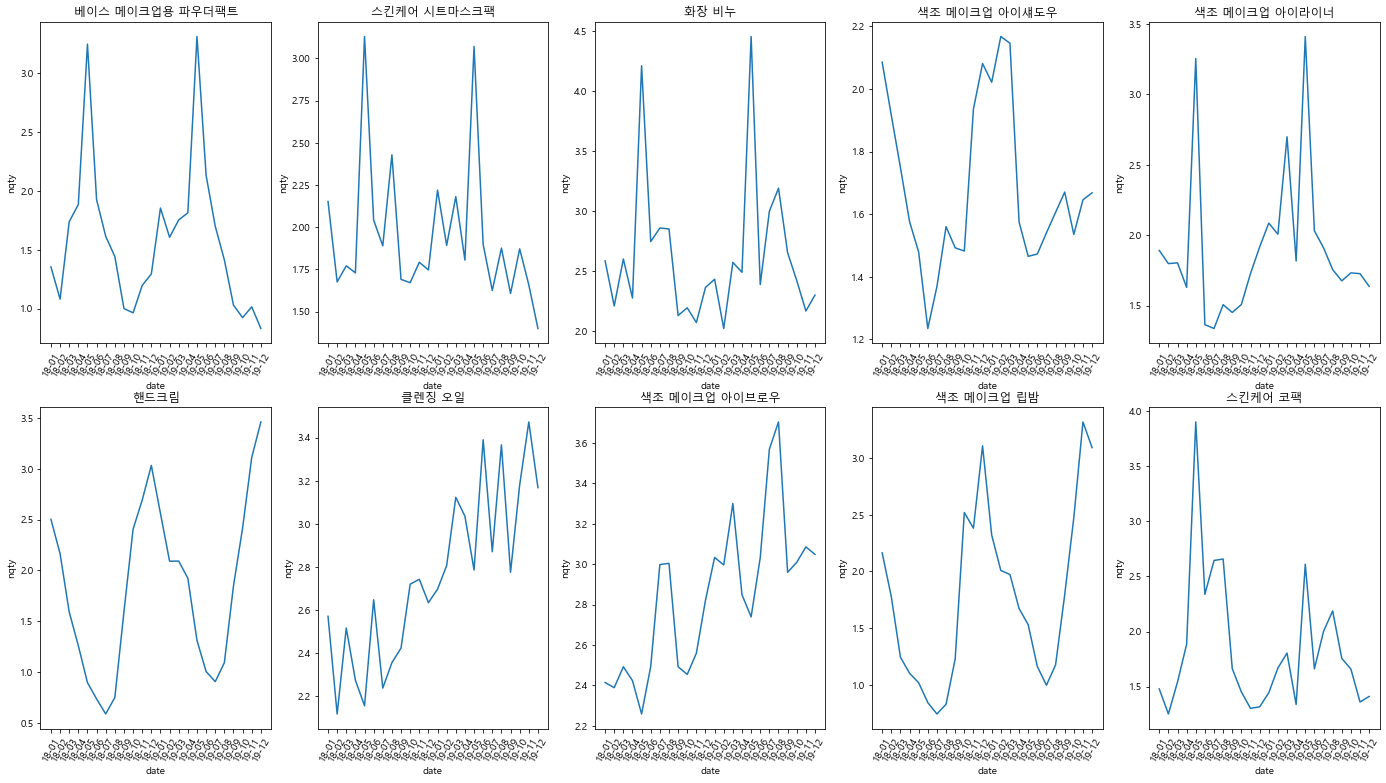

In [306]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 13)
beauty_list = beauty_popular.sm_cat[20:30].values.reshape(2,5)

for r in range(2):
    for c in range(5):
        plot_sm_cat_line(beauty, beauty_list[r,c], None, r, c)

* 예측 대상  
  * 단순 구매량만 예측할 것인가
  * 사실상 뭔가 더 필요한 건 가장 많이 구매할 성별, 연령대 등을 예측해주는게 좋지 않을까..?